In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from matplotlib import font_manager, rc
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14

In [3]:
raw_df = pd.read_csv(r'C:\Users\junoh\OneDrive\이너피플\git\두두월드\고겍세분화_dudu_221008.csv')

In [4]:
raw_df.head()

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,주소_도시급,주소_시군구급,회원그룹,구매건수,구매금액,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로
0,20210901000757-68539640174,20210901000757-68539640174_[1],S-21090100-260412059-01,13003000002,사각실속기프트세트,NaN,M83-0000000000000001,1,11900,11900,...,충남,당진시,그린(일반),1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
1,20210901000757-68539640174,20210901000757-68539640174_[2],S-21090100-260412059-00,13007000013,"납작이 1+1세트,홈쇼핑구성",NaN,M1301-00000000000001,1,54000,54000,...,충남,당진시,그린(일반),1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
2,20210901001324-15711112237,20210901001324-15711112237_[1],S-21090100-407834699-04,14006000052,슬라이딩트레이3개세트,NaN,M374-000000000000001,1,6900,6900,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
3,20210901001324-15711112237,20210901001324-15711112237_[2],S-21090100-407834699-03,14007000004,서랍칸 다용도박스 세트,,M390-000000000000002,1,6800,12000,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
4,20210901001324-15711112237,20210901001324-15711112237_[3],S-21090100-407834699-02,14005000002,원더바스켓 일자 확장형 선반,NaN,M410-000000000000001,1,12900,12900,...,전북,김제시,그린(일반),1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30344 entries, 0 to 30343
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               30344 non-null  object 
 1   품목별 주문번호           30344 non-null  object 
 2   배송번호               30344 non-null  object 
 3   주문상품코드             30344 non-null  object 
 4   주문상품명              30344 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  7157 non-null   object 
 6   옵션별상품코드            30344 non-null  object 
 7   주문품목 수량            30344 non-null  int64  
 8   주문품목 단가            30344 non-null  int64  
 9   주문품목 결제금액          30344 non-null  int64  
 10  주문일시               30344 non-null  object 
 11  주문경로               29371 non-null  object 
 12  주문검색어              23071 non-null  object 
 13  구매횟수               30343 non-null  float64
 14  결제금액(주문전체)         30344 non-null  int64  
 15  결제금액(품목별)          30344 non-null  int64  
 16  결제방법               303

#### 데이터 전처리

In [6]:
# columne 별 결측값 확인
raw_df.isnull().sum()

주문번호                     0
품목별 주문번호                 0
배송번호                     0
주문상품코드                   0
주문상품명                    0
상품옵션(옵션가격/타이틀미노출)    23187
옵션별상품코드                  0
주문품목 수량                  0
주문품목 단가                  0
주문품목 결제금액                0
주문일시                     0
주문경로                   973
주문검색어                 7273
구매횟수                     1
결제금액(주문전체)               0
결제금액(품목별)                0
결제방법                     0
결제상태                     0
주문상태(품목별)                0
입금확인일(결제일)             835
송장입력일                 2108
배송중처리일                2108
배송완료일                 2129
거래완료일                 2531
개인/기업                    0
회원가입일                    1
유입경로                     0
연계주문                  6428
상품 총금액                1736
최초 결제 금액                 0
상품번호                     0
대분류                      0
브랜드                      0
상품 검색어                   0
상품등록일                    0
아이디                      0
가입일                      0
회

In [7]:
# 거래완료일의 결측값이 있는 행은 거래가 이루어지지 않은 것으로 간주. --> 행 삭제 
df = raw_df.dropna(axis = 'index', subset=['거래완료일'], how = 'any')

In [8]:
# 결측 행 삭제 후 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 30343
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               27813 non-null  object 
 1   품목별 주문번호           27813 non-null  object 
 2   배송번호               27813 non-null  object 
 3   주문상품코드             27813 non-null  object 
 4   주문상품명              27813 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  6598 non-null   object 
 6   옵션별상품코드            27813 non-null  object 
 7   주문품목 수량            27813 non-null  int64  
 8   주문품목 단가            27813 non-null  int64  
 9   주문품목 결제금액          27813 non-null  int64  
 10  주문일시               27813 non-null  object 
 11  주문경로               26931 non-null  object 
 12  주문검색어              21152 non-null  object 
 13  구매횟수               27812 non-null  float64
 14  결제금액(주문전체)         27813 non-null  int64  
 15  결제금액(품목별)          27813 non-null  int64  
 16  결제방법               278

In [9]:
# 거래완료 된 건의 row 수 : 26,380건 확인. 
# 결측치 재확인

df.isnull().sum()

주문번호                     0
품목별 주문번호                 0
배송번호                     0
주문상품코드                   0
주문상품명                    0
상품옵션(옵션가격/타이틀미노출)    21215
옵션별상품코드                  0
주문품목 수량                  0
주문품목 단가                  0
주문품목 결제금액                0
주문일시                     0
주문경로                   882
주문검색어                 6661
구매횟수                     1
결제금액(주문전체)               0
결제금액(품목별)                0
결제방법                     0
결제상태                     0
주문상태(품목별)                0
입금확인일(결제일)               0
송장입력일                    0
배송중처리일                   0
배송완료일                    0
거래완료일                    0
개인/기업                    0
회원가입일                    1
유입경로                     0
연계주문                  5844
상품 총금액                  11
최초 결제 금액                 0
상품번호                     0
대분류                      0
브랜드                      0
상품 검색어                   0
상품등록일                    0
아이디                      0
가입일                      0
회

In [130]:
df_by_id = pd.DataFrame(df.groupby('아이디')['주문품목 결제금액'].sum())
df_by_id.sort_values('주문품목 결제금액', ascending = False)
#df[df['아이디'] == 'nh@fde74b0']

,주문품목 결제금액
아이디,
nh@fde74b0,30067850
shenshop,7550300
ksm001,1808100
jungliin,1143150
nh@1c960cd,1078300
...,...
nh@80b77,1980
hjlee0831,1960
nh@e7d53a5e,1600


#### 고객 아이디 기준으로 고객별 특징 추출 
       - 이를 통해 RFM 분석을 위한 데이터 정제

In [10]:
len(df.아이디.unique())

6815

In [11]:
# 총 6,815개의 아이디로 구성. 즉 총 6,814 명의 고객
# 고객(아이디)별 최근성(Recency), 주문건수(Frequency), 구매금액(Monetary)  칼럼 생성 및 데이터 추출  --> 고객 군집화

In [12]:
# 고객 군집화를 위한 dataframe 생성
cluster_df = pd.DataFrame({'고객_id' : df.아이디.unique()})
cluster_df.head()
#cluster_df.info()

,고객_id
0,ja6227
1,ka@12ddd
2,lazurpleur
3,nh@5f65e332
4,pointhj01


In [13]:
# 주문건수(Frequency) 
#  1) 원 데이터프레임(df)의 고객(아이디)와 주문번호 기준으로 중복값 제거 후, 고객(아이디)별 갯수를 count --> 주문횟수가 됨 ( 이는 dataframe이 아닌, series 형태 )
num_order_by_id = df.drop_duplicates(subset =['아이디', '주문번호'])['아이디'].value_counts()

In [14]:
print(type(num_order_by_id))
num_order_by_id.head()

<class 'pandas.core.series.Series'>


nh@fde74b0    569
shenshop       18
nh@5fdacf4     18
jungliin       16
nh@2851d86     13
Name: 아이디, dtype: int64

In [15]:
#  고객_id를 num_order_by_id로 대체하여, cluster_df에 '주문횟수'를 생성
cluster_df['주문횟수'] = cluster_df['고객_id'].replace(num_order_by_id.to_dict())
cluster_df.head()
#cluster_df.주문횟수.unique()

,고객_id,주문횟수
0,ja6227,1
1,ka@12ddd,1
2,lazurpleur,1
3,nh@5f65e332,1
4,pointhj01,2


In [16]:
# 고객_id 별 주문품목 결제금액 
sum_pay_by_id = df.groupby('아이디')['주문품목 결제금액'].sum()
print(type(sum_pay_by_id))
cluster_df['주문금액합계'] = cluster_df.고객_id.replace(sum_pay_by_id.to_dict())
cluster_df.head()

<class 'pandas.core.series.Series'>


,고객_id,주문횟수,주문금액합계
0,ja6227,1,65900
1,ka@12ddd,1,49900
2,lazurpleur,1,36340
3,nh@5f65e332,1,9900
4,pointhj01,2,35390


In [17]:
# 고객_id별 주문품목 수량 
sum_qty_by_id = df.groupby('아이디')['주문품목 수량'].sum()
sum_qty_by_id.head()
cluster_df['주문량'] = cluster_df.고객_id.replace(sum_qty_by_id.to_dict())
cluster_df.head()
#  column 순서 변경
cluster_df = cluster_df[['고객_id',	'주문횟수',	'주문량', '주문금액합계']]
cluster_df.head()

,고객_id,주문횟수,주문량,주문금액합계
0,ja6227,1,2,65900
1,ka@12ddd,1,5,49900
2,lazurpleur,1,19,36340
3,nh@5f65e332,1,1,9900
4,pointhj01,2,14,35390


In [18]:
# 고객_id 별 평균가격 
cluster_df['평균가격'] = cluster_df.주문금액합계 / cluster_df.주문량
cluster_df.head()
#  column 순서 변경
cluster_df = cluster_df[['고객_id',	'주문횟수',	'주문량', '평균가격', '주문금액합계']]
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계
0,ja6227,1,2,32950.000000,65900
1,ka@12ddd,1,5,9980.000000,49900
2,lazurpleur,1,19,1912.631579,36340
3,nh@5f65e332,1,1,9900.000000,9900
4,pointhj01,2,14,2527.857143,35390


In [19]:
# 고객_id별 최근성(Recency)
# 총 거래 건 중 가장 최근일
df.주문일시.max()
# 최근일 + 1일을 최근성 기준일 선정 --> 2022-07-01 
base_date = pd.to_datetime('2022-07-01') 

recency_by_id = df.groupby('아이디')['주문일시'].max()
cluster_df['최근주문일'] = cluster_df.고객_id.replace(recency_by_id.to_dict())
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일
0,ja6227,1,2,32950.000000,65900,2021-09-01 0:07
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 0:13
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 0:23
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 0:28
4,pointhj01,2,14,2527.857143,35390,2022-03-27 0:22


In [20]:

cluster_df.최근주문일 = pd.to_datetime(cluster_df.최근주문일)
type(cluster_df.최근주문일)

diff = (base_date - cluster_df.최근주문일)
diff.head()
cluster_df['최근성'] = diff
cluster_df.head()
#type(cluster_df.iloc[0,6])

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302 days 23:53:00
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302 days 23:47:00
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302 days 23:37:00
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302 days 23:32:00
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95 days 23:38:00


In [21]:
cluster_df.info()
# 최근성의 dtype을 timedelta64에서 int로 변환 : dt.days 활용
cluster_df['최근성'] = cluster_df['최근성'].dt.days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   고객_id   6815 non-null   object         
 1   주문횟수    6815 non-null   int64          
 2   주문량     6815 non-null   int64          
 3   평균가격    6815 non-null   float64        
 4   주문금액합계  6815 non-null   int64          
 5   최근주문일   6815 non-null   datetime64[ns] 
 6   최근성     6815 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1), timedelta64[ns](1)
memory usage: 372.8+ KB


In [22]:
cluster_df.info()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6815 entries, 0 to 6814
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객_id   6815 non-null   object        
 1   주문횟수    6815 non-null   int64         
 2   주문량     6815 non-null   int64         
 3   평균가격    6815 non-null   float64       
 4   주문금액합계  6815 non-null   int64         
 5   최근주문일   6815 non-null   datetime64[ns]
 6   최근성     6815 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 372.8+ KB


,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95


In [23]:
# 고객_id 별 성별 
sex_df = df.drop_duplicates(subset = ['아이디', '성별'], keep = 'first')[['아이디','성별']]
sex_df.head()
cluster_df['sex'] = sex_df['성별'].to_list()
cluster_df.rename(columns = {'sex' :'성별'}, inplace = True)
cluster_df.head(10)

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여
5,ka@6090888f,1,6,2900.000000,17400,2021-09-01 01:17:00,302,선택안함
6,nh@12e4300,1,4,11650.000000,46600,2021-09-01 01:37:00,302,여
7,ka@14f2d30,1,7,5971.428571,41800,2021-09-01 02:52:00,302,여
8,peo0318,1,3,10800.000000,32400,2021-09-01 08:02:00,302,여
9,zeroyy2,1,3,16200.000000,48600,2021-09-01 08:24:00,302,여


In [24]:
#고객_id별 나이 추가
age_df = df.drop_duplicates(subset = ['아이디', '나이'], keep = 'first')[['아이디','나이']]
age_df.head()
cluster_df['age'] = age_df['나이'].to_list()
cluster_df.rename(columns = {'age' :'나이'}, inplace = True)
cluster_df.head(10)

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40
5,ka@6090888f,1,6,2900.000000,17400,2021-09-01 01:17:00,302,선택안함,확인불가
6,nh@12e4300,1,4,11650.000000,46600,2021-09-01 01:37:00,302,여,51
7,ka@14f2d30,1,7,5971.428571,41800,2021-09-01 02:52:00,302,여,37
8,peo0318,1,3,10800.000000,32400,2021-09-01 08:02:00,302,여,42
9,zeroyy2,1,3,16200.000000,48600,2021-09-01 08:24:00,302,여,47


In [25]:
#고객_id 별 회원그룹 추가
회원그룹_df = df.drop_duplicates(subset = ['아이디', '회원그룹'], keep = 'first')[['아이디','회원그룹']]
cluster_df['회원그룹'] = 회원그룹_df['회원그룹'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반)
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반)
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반)
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루


In [26]:
#고객_id 별 회원구분 추가
회원구분_df = df.drop_duplicates(subset = ['아이디', '회원구분'])[['아이디','회원구분']]
회원구분_df.head()
cluster_df['회원구분'] = 회원구분_df['회원구분'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인


In [27]:
# 고객_id 별 주소_도시급, 주소_시군구급 추가
주소_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디','주소_도시급', '주소_시군구급']]
주소_df.head()
주소_df.info()

cluster_df['주소_도시급'] = 주소_df['주소_도시급'].to_list()
cluster_df['주소_시군구급'] = 주소_df['주소_시군구급'].to_list()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6815 entries, 0 to 30334
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   아이디      6815 non-null   object
 1   주소_도시급   6815 non-null   object
 2   주소_시군구급  6815 non-null   object
dtypes: object(3)
memory usage: 213.0+ KB


,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시


In [28]:
#고객_id별 유입경로 (online_channel)

#유입경로_df = df.drop_duplicates(subset = ['아이디','유입경로'], keep = 'first')[['아이디', '유입경로']] 실행 시
##  --> ValueError: Length of values (6957) does not match length of index (6815) --> 142개의 고객_id( 약 2.1%) 가 복수의 경로 사용 --> 첫 경로로 적용
유입경로_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디', '유입경로']] 
cluster_df['구매경로'] = 유입경로_df['유입경로'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE


In [29]:
# 고객_id 별 결제방법

#결제방법_df = df.drop_duplicates(subset = ['아이디', '결제방법'], keep = 'first')[['아이디','결제방법']] 실행 시
## --> ValueError: Length of values (7619) does not match length of index (6815) --> 804개의 고객_id(약 11.%) 가 복수의 경로 사용 --> 첫 경로로 적용
결제방법_df = df.drop_duplicates(subset = ['아이디'], keep = 'first')[['아이디','결제방법']]
cluster_df['결제방법'] = 결제방법_df['결제방법'].to_list()
cluster_df.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [30]:
cluster_df_1 = cluster_df.copy()
cluster_df_1.head()

,고객_id,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [31]:
cluster_df_1.set_index('고객_id', inplace = True)
cluster_df_1.head()

,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
고객_id,,,,,,,,,,,,,,
ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


##### 고객_id 특성에 따른 Clustering 수행
        - 세가지 방식 ( k-means, AgglomerativeClustering, DBSCAN ) 을 수행 후 평가
        - 평가 결과가 가장 좋은 방식으로 clustering 수행

###### (1) k-means

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
# clustering 진행을 위한 column 선택
rfm_df = cluster_df_1[['주문횟수', '주문량',  '주문금액합계', '최근성']]
rfm_df.head()

,주문횟수,주문량,주문금액합계,최근성
고객_id,,,,
ja6227,1,2,65900,302
ka@12ddd,1,5,49900,302
lazurpleur,1,19,36340,302
nh@5f65e332,1,1,9900,302
pointhj01,2,14,35390,95


In [34]:
#표쥰화
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_scaled_df = pd.DataFrame(rfm_df_scaled, index = rfm_df.index)
rfm_scaled_df.head()

,0,1,2,3
고객_id,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694
lazurpleur,-0.053060,0.657406,-0.087304,1.759694
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694
pointhj01,0.091407,0.389994,-0.089803,-0.655686


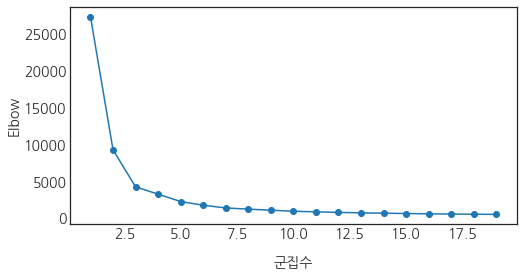

In [35]:
# k-means clustering 수 선정

elbow = []

for i in range(1,20):
    km = KMeans( n_clusters = i, init = 'k-means++', n_init = 10,
                            random_state = 0 )
    km.fit(rfm_scaled_df)
    elbow.append(km.inertia_)
    
plt.figure(figsize = (8, 4))
plt.plot(range(1,20), elbow, marker = 'o')
plt.xlabel('군집수', labelpad = 15)
plt.ylabel('Elbow')
plt.show()

In [36]:
#  왜곡 정도가 매우 높은 데이터 세트에 k-means 을 적용하면, 중심의 개수를 증가키더라도 변별력이 떨어지는 군집화가 수행됨. 
# 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정 후 k-means 평균 수행

# 실루엣 계수 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [37]:
#  군집 갯수 별 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [38]:
model = KMeans(n_clusters = 5, random_state = 22100801)
labels = model.fit_predict(rfm_scaled_df)
rfm_df['군집_km'] = labels
#rfm_df.drop('군집', axis = 1, inplace = True)
print('실루엣 스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, labels)))
rfm_df.head()

실루엣 스코어 : 0.4406


,주문횟수,주문량,주문금액합계,최근성,군집_km
고객_id,,,,,
ja6227,1,2,65900,302,0
ka@12ddd,1,5,49900,302,0
lazurpleur,1,19,36340,302,0
nh@5f65e332,1,1,9900,302,0
pointhj01,2,14,35390,95,2


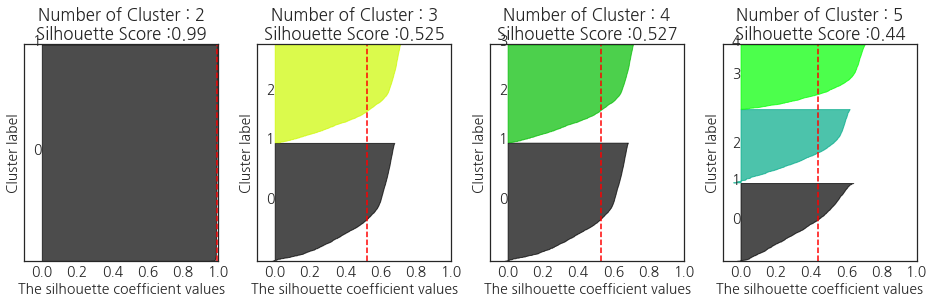

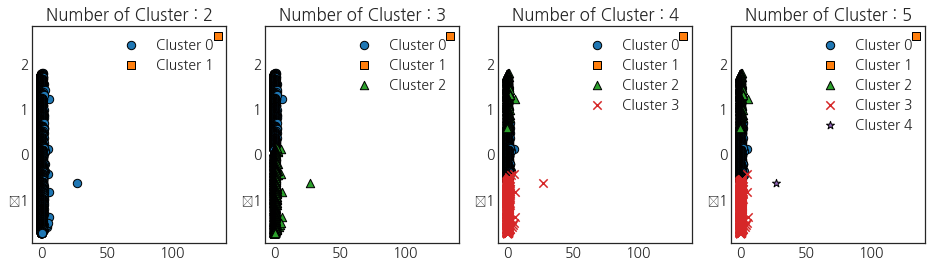

In [39]:
# 실루엣스코어가 0.4406로 제법 좋은 수치임

# 각 군집 별 스토어 확인
visualize_silhouette([2,3,4,5], rfm_scaled_df)
visualize_kmeans_plot_multi([2,3,4,5], rfm_scaled_df)

In [40]:
rfm_df['군집_km'].value_counts()

3    2558
2    2145
0    2110
1       1
4       1
Name: 군집_km, dtype: int64

In [41]:
rfm_scaled_df_k = rfm_scaled_df.copy()
rfm_scaled_df_k['k_labels'] = labels
rfm_scaled_df_k.head()

,0,1,2,3,k_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,2


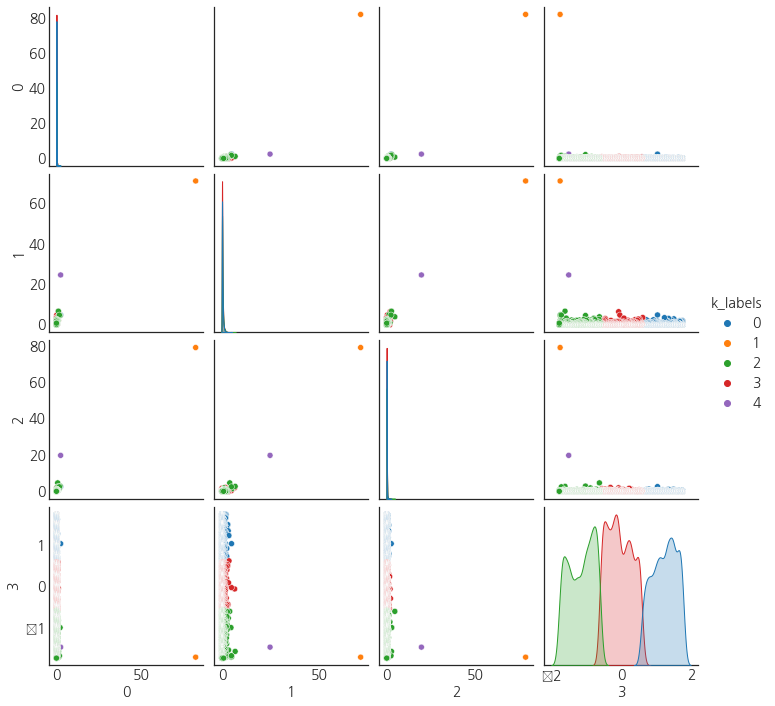

In [42]:
# pairplot으로 Kmeans 군집화 시각화
sns.pairplot(rfm_scaled_df_k, hue = 'k_labels', palette='tab10')
plt.show()

In [43]:
print(rfm_df.loc[rfm_df['군집_km'] == 1])
print('\n')
print('=' * 50)
print('\n')
print(rfm_df.loc[rfm_df['군집_km'] == 4])

            주문횟수   주문량    주문금액합계  최근성  군집_km
고객_id                                       
nh@fde74b0   569  1337  30067850    2      1




          주문횟수  주문량   주문금액합계  최근성  군집_km
고객_id                                   
shenshop    18  465  7550300   23      4


###### (2) Agglomerative Clustering

In [44]:
# Agglomerative Clustering(병합군집)은 시작할 때 각 포인트를 하나의 cluster로 지정하고, 
# 그 다음 종료 조건을 만족할 때가지 가장 비슷한 두 클러스터를 합침

from sklearn.cluster import AgglomerativeClustering as AC

In [45]:
for i in range(2,6):
    ac_model = AC(n_clusters = i, affinity = 'cosine', linkage = 'average')
    ac_labels = ac_model.fit_predict(rfm_scaled_df)
    print('실루엣스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, ac_labels)))
    
rfm_df.head()

실루엣스코어 : 0.5106
실루엣스코어 : 0.5013
실루엣스코어 : 0.1041
실루엣스코어 : 0.0999


,주문횟수,주문량,주문금액합계,최근성,군집_km
고객_id,,,,,
ja6227,1,2,65900,302,0
ka@12ddd,1,5,49900,302,0
lazurpleur,1,19,36340,302,0
nh@5f65e332,1,1,9900,302,0
pointhj01,2,14,35390,95,2


In [46]:
rfm_scaled_df_ac = rfm_scaled_df.copy()

ac_model = AC(n_clusters = 3, affinity = 'cosine', linkage = 'average')
ac_labels = ac_model.fit_predict(rfm_scaled_df)

rfm_scaled_df_ac['ac_labels'] = ac_labels
rfm_scaled_df_ac.head()

,0,1,2,3,ac_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,2


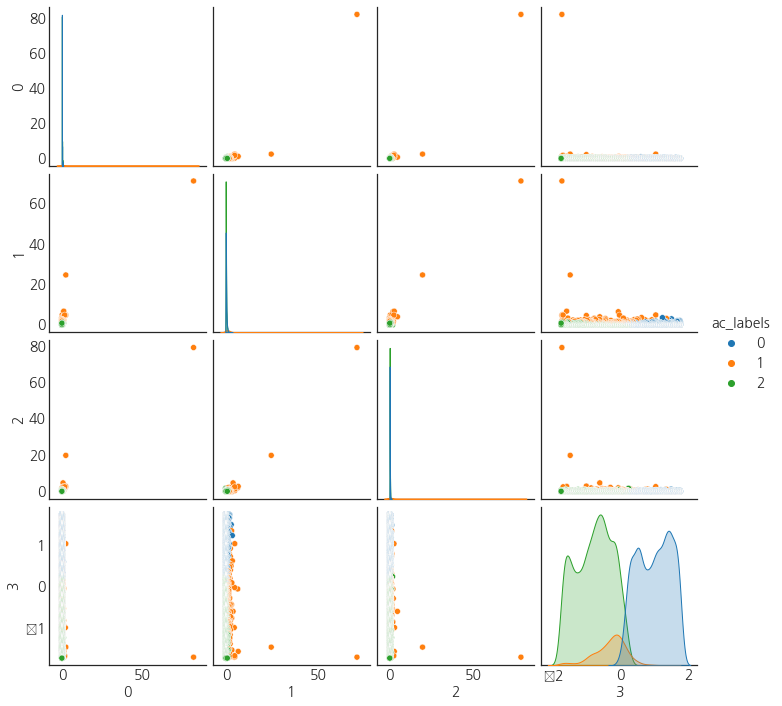

In [47]:
sns.pairplot(rfm_scaled_df_ac, hue = 'ac_labels', palette='tab10')
plt.show()

###### (3) DBSCAN 

In [48]:
from sklearn.cluster  import DBSCAN

In [49]:
ds_model = DBSCAN(eps = 0.5, min_samples = 2)
ds_labels = ds_model.fit_predict(rfm_scaled_df)
print('실루엣스코어 : {0:.4f}'.format(silhouette_score(rfm_scaled_df, ds_labels)))

실루엣스코어 : 0.4181


In [50]:
rfm_scaled_df_ds = rfm_scaled_df.copy()
rfm_scaled_df_ds['ds_labels'] = ds_labels
rfm_scaled_df_ds.head()

,0,1,2,3,ds_labels
고객_id,,,,,
ja6227,-0.053060,-0.251795,-0.009539,1.759694,0
ka@12ddd,-0.053060,-0.091348,-0.051631,1.759694,0
lazurpleur,-0.053060,0.657406,-0.087304,1.759694,0
nh@5f65e332,-0.053060,-0.305277,-0.156861,1.759694,0
pointhj01,0.091407,0.389994,-0.089803,-0.655686,0


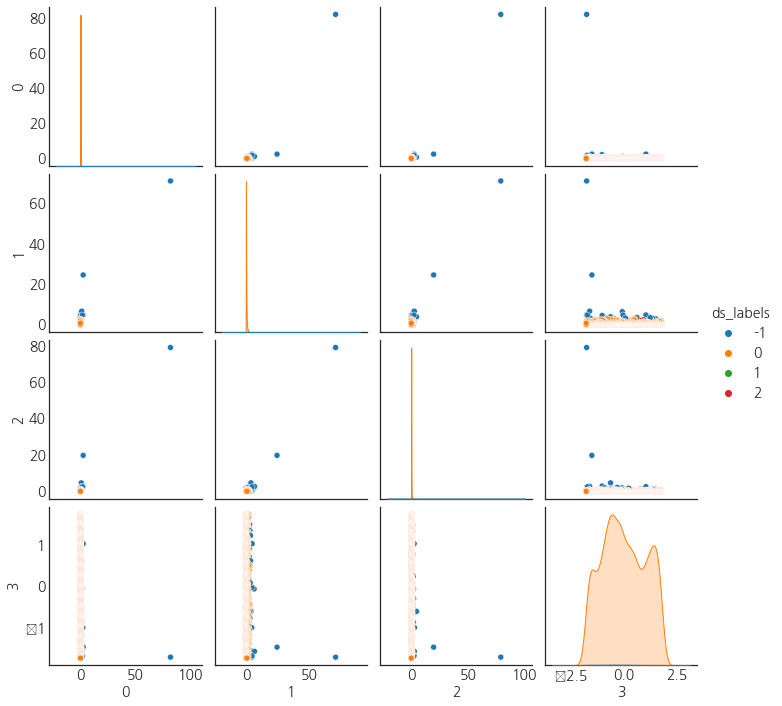

In [51]:
sns.pairplot(rfm_scaled_df_ds, hue = 'ds_labels', palette = 'tab10')
plt.show()

In [52]:
# DBSCAN은 하나의 cluster에 너무 편중되어 있슴 --> Duduworld의 고객세분화에 적합하지 않음. 
rfm_scaled_df_ds['ds_labels'].value_counts()

 0    6780
-1      31
 1       2
 2       2
Name: ds_labels, dtype: int64

#####   ---> K-Means 에 의한 Clustering에  의한 결과값 채택

In [53]:
# Cluster에 따른 각 feature 별 평균

#rfm_df.drop('군집_AC', axis = 1, inplace = True)
rfm_df.head()

rfm_df.groupby('군집_km')['주문횟수',	'주문량',	'주문금액합계',	'최근성'].mean()

,주문횟수,주문량,주문금액합계,최근성
군집_km,,,,
0,1.176303,6.082938,5.760514e+04,256.014218
1,569.000000,1337.000000,3.006785e+07,2.000000
2,1.379487,6.762238,6.778031e+04,52.801865
3,1.286161,6.478890,6.617075e+04,147.343237
4,18.000000,465.000000,7.550300e+06,23.000000


#### 제품 

In [54]:
print('### 주문상품명 기준 건 수(상위 100 건 기준)')
print(' ')
print(df.주문상품명.value_counts().iloc[:100])
print('$' * 50)
print(' ')
print('### 대분류  기준 건 수')
print(' ')
print(df.대분류.value_counts())

### 주문상품명 기준 건 수(상위 100 건 기준)
 
서랍칸 다용도박스 세트                    954
[무료배송] 하프트레이대소 12개세트_투명/화이트     742
실리쿡 계란 레일바스켓 30구                657
유리물병 1000ml 3개                  557
냉장고 냉동실 정리용기 깊은2호 8개세트(아이보리)    474
                               ... 
수납홀더 삼각타입(반투명) 1개/4개/8개          79
트레이중더블 1개                        78
[무료배송] 원더브러쉬 4P + 특별 사은품         77
원형 수납용기 (특하프) 세트                 76
하프트레이소 6개세트_투명/화이트               75
Name: 주문상품명, Length: 100, dtype: int64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
 
### 대분류  기준 건 수
 
냉장고 정리    13616
정리수납용품    11240
유리용품       1565
주방용품        872
생활수납용품      475
기타상품         45
Name: 대분류, dtype: int64


In [55]:
print(df.상품번호.value_counts())
print(df.주문상품명.value_counts())
print(df.주문상품코드.value_counts())

390        954
3520540    742
402        657
180        569
43         561
          ... 
369          1
301          1
3520497      1
3520528      1
3520496      1
Name: 상품번호, Length: 324, dtype: int64
서랍칸 다용도박스 세트                    954
[무료배송] 하프트레이대소 12개세트_투명/화이트     742
실리쿡 계란 레일바스켓 30구                657
유리물병 1000ml 3개                  557
냉장고 냉동실 정리용기 깊은2호 8개세트(아이보리)    474
                               ... 
스텐물병1000ml 1개                     1
마스크쏙! 픽미 3개세트                     1
스윙병 500ml 1개                      1
슬림홈 수납큰바구니小(아이보리)                 1
마스크쏙! 픽미 5개                       1
Name: 주문상품명, Length: 423, dtype: int64
14007000004    489
14007000004    465
14006000106    465
13003000008    343
14004000006    338
              ... 
16004000006      1
14005000007      1
18002000011      1
13004000001      1
15005000004      1
Name: 주문상품코드, Length: 605, dtype: int64


In [56]:
product_by_id = df.groupby('아이디')['상품번호'].apply(list)
product_by_id.head()

아이디
0223cha@naver.com                                  [341, 390, 3519717]
0514lmy                                                      [3519841]
0baltan                                                 [3520972, 959]
1004and              [3520540, 3520546, 3520546, 3520540, 3520540, ...
1204promise                                     [3520551, 390, 107, 1]
Name: 상품번호, dtype: object

In [57]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
encoder = TransactionEncoder()
te_df = encoder.fit_transform(product_by_id)
te_df = pd.DataFrame(te_df, columns = encoder.columns_, index = product_by_id.index)
te_df.head()

,1,2,5,7,8,9,10,12,23,25,...,3520969,3520970,3520972,3521054,3521055,3521056,3521065,3521066,3521072,3521073
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1004and,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
te_v1_df = te_df.loc[:,te_df.columns[te_df.sum(axis = 0) > 100]]
te_v1_df.head()

,1,2,7,9,10,12,37,38,39,40,...,3520563,3520568,3520569,3520571,3520588,3520644,3520645,3520652,3520653,3520735
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004and,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
p_model = KMeans(n_clusters = 5, random_state = 22100802)
p_label = p_model.fit_predict(te_v1_df)
te_v1_df['km_군집'] = p_label
te_v1_df.head()

,1,2,7,9,10,12,37,38,39,40,...,3520568,3520569,3520571,3520588,3520644,3520645,3520652,3520653,3520735,km_군집
아이디,,,,,,,,,,,,,,,,,,,,,
0223cha@naver.com,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
0514lmy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
0baltan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1004and,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,0
1204promise,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4


In [61]:
te_v1_df.km_군집.value_counts()

0    4535
4     774
2     676
1     430
3     400
Name: km_군집, dtype: int64

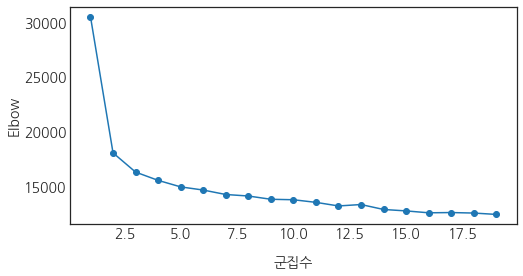

In [62]:
k_elbow = []

for i in range(1, 20):
    km = KMeans( n_clusters = i, init = 'k-means++', n_init = 10,
                            random_state = 0 )
    km.fit(te_v1_df)
    k_elbow.append(km.inertia_)
    
plt.figure(figsize = (8, 4))
plt.plot(range(1,20), k_elbow, marker = 'o')
plt.xlabel('군집수', labelpad = 15)
plt.ylabel('Elbow')
plt.show()

In [63]:
print('시루엣스코어 : {0:.4f}'.format(silhouette_score(te_v1_df, p_label)))

시루엣스코어 : 0.2091


0    4535
4     774
2     676
1     430
3     400
Name: km_군집, dtype: int64


<AxesSubplot:>

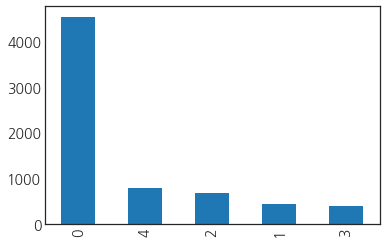

In [64]:
# Cluster 크기 확인
cluster_size = te_v1_df.km_군집.value_counts()
print(cluster_size)
cluster_size.plot(kind = 'bar')

In [65]:
# Cluster 별 분석을 위한 Dataframe 정리
rfm_df.head()

,주문횟수,주문량,주문금액합계,최근성,군집_km
고객_id,,,,,
ja6227,1,2,65900,302,0
ka@12ddd,1,5,49900,302,0
lazurpleur,1,19,36340,302,0
nh@5f65e332,1,1,9900,302,0
pointhj01,2,14,35390,95,2


In [66]:
cluster_df.rename(columns = {'고객_id' : '아이디'}, inplace = True)
cluster_df.head()

,아이디,주문횟수,주문량,평균가격,주문금액합계,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제)
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금


In [67]:

#rfm_df.drop(columns = 'index',  inplace = True)

rfm_df.reset_index(inplace = True)
#rfm_df.drop(columns = 'index', inplace = True)
rfm_df.rename(columns = {'고객_id' : '아이디'}, inplace = True)

In [68]:
customer_df = pd.merge(cluster_df, rfm_df, how = 'outer', on = '아이디')
customer_df.drop(['주문횟수_y',	'주문량_y',	'주문금액합계_y',	'최근성_y'], axis = 1, inplace = True)
customer_df.head()
#customer_df.나이.value_counts()

,아이디,주문횟수_x,주문량_x,평균가격,주문금액합계_x,최근주문일,최근성_x,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법,군집_km
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드,0
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드,0
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드,0
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,확인불가,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제),0
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금,2


In [69]:
full_df = pd.merge(df, rfm_df, how = 'outer', on = '아이디')
full_df.head()
full_df.아이디.value_counts()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 27812
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               27813 non-null  object 
 1   품목별 주문번호           27813 non-null  object 
 2   배송번호               27813 non-null  object 
 3   주문상품코드             27813 non-null  object 
 4   주문상품명              27813 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  6598 non-null   object 
 6   옵션별상품코드            27813 non-null  object 
 7   주문품목 수량            27813 non-null  int64  
 8   주문품목 단가            27813 non-null  int64  
 9   주문품목 결제금액          27813 non-null  int64  
 10  주문일시               27813 non-null  object 
 11  주문경로               26931 non-null  object 
 12  주문검색어              21152 non-null  object 
 13  구매횟수               27812 non-null  float64
 14  결제금액(주문전체)         27813 non-null  int64  
 15  결제금액(품목별)          27813 non-null  int64  
 16  결제방법               278

### Cluster  Analysis : 고객 성향 분석 및 제품 분석
####    
#####         1. 고객 성향 분석 : 활용 데이터 --> Dataframe  'customer_df'
#####        2. 제품 분석 : 활용 데이터 --> Dataframe 'full_df'

3    2558
2    2145
0    2110
1       1
4       1
Name: 군집_km, dtype: int64


Text(0.5, 1.0, '군집 별 분포')

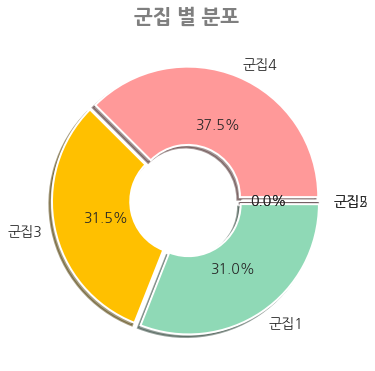

In [70]:
# 고객 분석 데이터 ( customer_df )로 보는 Custer 크기
num_by_cluster = customer_df.군집_km.value_counts()
print(num_by_cluster)

# 파이차트로 시각화

x_label =  ['군집4', '군집3', '군집1', '군집2', '군집5']

plt.figure(figsize = (6, 6))
plt.pie(num_by_cluster, 
           labels = x_label, 
           autopct = '%.1f%%',
           shadow = True,
           colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],
           explode =  [0.03, 0.03, 0.03, 0.03, 0.03],
           wedgeprops = {'width' : 0.6, 'edgecolor' : 'w', 'linewidth' : 2}
            )
plt.title('군집 별 분포', fontsize = 20, pad = 15, color = '#7F7F7F', fontweight = 'bold' )

In [71]:
# 고객 별 나이 분석
pd.crosstab(customer_df.군집_km, customer_df.나이)
customer_df.replace({'나이' : '확인불가'}, 0, inplace = True)
customer_df = customer_df.astype({'나이' : 'int'})
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6815 entries, 0 to 6814
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   아이디       6815 non-null   object        
 1   주문횟수_x    6815 non-null   int64         
 2   주문량_x     6815 non-null   int64         
 3   평균가격      6815 non-null   float64       
 4   주문금액합계_x  6815 non-null   int64         
 5   최근주문일     6815 non-null   datetime64[ns]
 6   최근성_x     6815 non-null   int64         
 7   성별        6815 non-null   object        
 8   나이        6815 non-null   int32         
 9   회원그룹      6815 non-null   object        
 10  회원구분      6815 non-null   object        
 11  주소_도시급    6815 non-null   object        
 12  주소_시군구급   6815 non-null   object        
 13  구매경로      6815 non-null   object        
 14  결제방법      6815 non-null   object        
 15  군집_km     6815 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object

In [72]:
def get_age_bins(x):
    if x == 0 :
        age = 'NA'
    elif x < 10 :
        age = '소아'
    elif x < 20 : 
        age = '10대'
    elif x < 30 : 
        age = '20대'
    elif x < 40 : 
        age = '30대'
    elif x < 50 : 
        age = '40대'
    elif x < 60 : 
        age = '50대'
    elif x < 70 : 
        age = '60대'
    elif x < 80 : 
        age = '70대'
    elif x < 90 : 
        age = '80대'
    elif x < 100 : 
        age = '90대'
    else : 
        age = '고령'
    return age 

In [73]:
customer_df['나이대'] = customer_df['나이'].apply(lambda  x : get_age_bins(x)) # 나이 정보가 없는 곳은 '0'으로 대체 및 나이대는 'NA' 로 변환
customer_df.rename(columns = {'최근성_x' : '최근성'}, inplace = True)
customer_df.head()

,아이디,주문횟수_x,주문량_x,평균가격,주문금액합계_x,최근주문일,최근성,성별,나이,회원그룹,회원구분,주소_도시급,주소_시군구급,구매경로,결제방법,군집_km,나이대
0,ja6227,1,2,32950.000000,65900,2021-09-01 00:07:00,302,여,63,그린(일반),개인,충남,당진시,MOBILE,카드,0,60대
1,ka@12ddd,1,5,9980.000000,49900,2021-09-01 00:13:00,302,여,33,그린(일반),개인,전북,김제시,MOBILE,카드,0,30대
2,lazurpleur,1,19,1912.631579,36340,2021-09-01 00:23:00,302,여,41,그린(일반),개인,경기,광주시,MOBILE,카드,0,40대
3,nh@5f65e332,1,1,9900.000000,9900,2021-09-01 00:28:00,302,여,0,그린(일반),개인,서울,노원구,MOBILE,머니(카카오페이 간편결제),0,NA
4,pointhj01,2,14,2527.857143,35390,2022-03-27 00:22:00,95,여,40,블루,개인,경기,고양시,MOBILE,카드+적립금,2,40대


In [74]:
pd.crosstab(customer_df.군집_km, customer_df.나이대, margins = True)

나이대,10대,20대,30대,40대,50대,60대,70대,80대,NA,고령,소아,All
군집_km,,,,,,,,,,,,
0,0,72,523,719,449,101,10,0,230,0,6,2110
1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,73,556,747,542,86,5,1,127,4,4,2145
3,1,76,692,920,539,112,9,0,199,0,10,2558
4,0,0,0,0,1,0,0,0,0,0,0,1
All,1,221,1771,2386,1531,299,24,1,557,4,20,6815


Text(0.0, 1.0, '군집4')

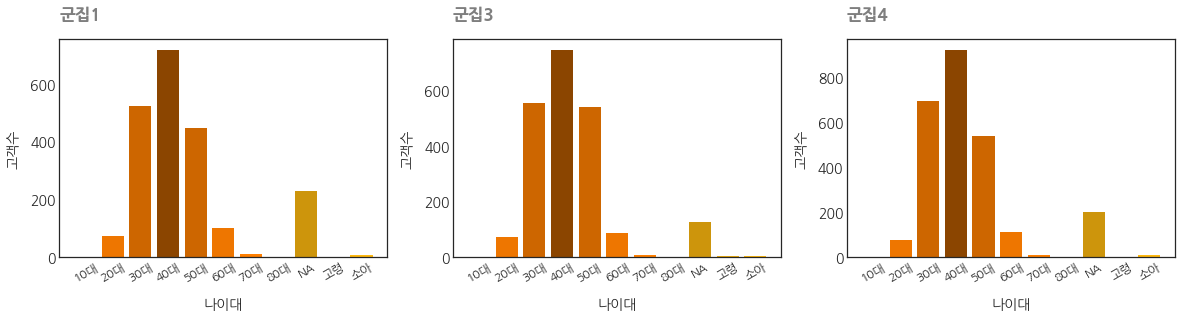

In [75]:
# 군집별 연령대별 분포 시각화

plt.figure(figsize = (20, 4))

age_bins = ['10대',	'20대',	'30대',	'40대',	'50대',	'60대',	'70대',	'80대',	'NA',	'고령',	'소아']
colors = ['#FF7F00',	"#EE7600",	"#CD6600",	'#8B4500',	'#CD6600',	'#EE7600',	'#FF7F00',	'#FF8C00',	'#CD950C',	'#EEAD0E',	'#FFB90F']
index = np.arange(len(age_bins))

plt.subplot(1,3,1)
age = [0,	72,	523,	719,	449,	101,	10,	0,	230,	0,	6]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집1', loc = 'left', pad = 20,  color = '#7F7F7F', fontweight = 'bold')

plt.subplot(1,3,2)
age = [0,	73,	556,	747,	542,	86,	5,	1,	127,	4,	4]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집3', loc = 'left', pad = 20, color = '#7F7F7F', fontweight = 'bold')

plt.subplot(1,3,3)
age = [1,	76,	692,	920,	539,	112,	9,	0,	199,	0,	10]
plt.bar(age_bins, age, color = colors, width = 0.8)
plt.xticks(index, age_bins, rotation = 30, fontsize = 12)
plt.xlabel('나이대', labelpad = 15)
plt.ylabel('고객수', labelpad = 10)
plt.title('군집4', loc = 'left', pad = 20, color = '#7F7F7F', fontweight = 'bold')


In [76]:
ct_성별_df = pd.crosstab(customer_df.군집_km, customer_df.성별)
ct_성별_df = ct_성별_df.drop([1,4], axis = 0)
ct_성별_df = ct_성별_df[['남', '여', '선택안함']]
print(ct_성별_df)

성별      남     여  선택안함
군집_km                
0      13  1889   208
2       7   867  1271
3      17  2365   176


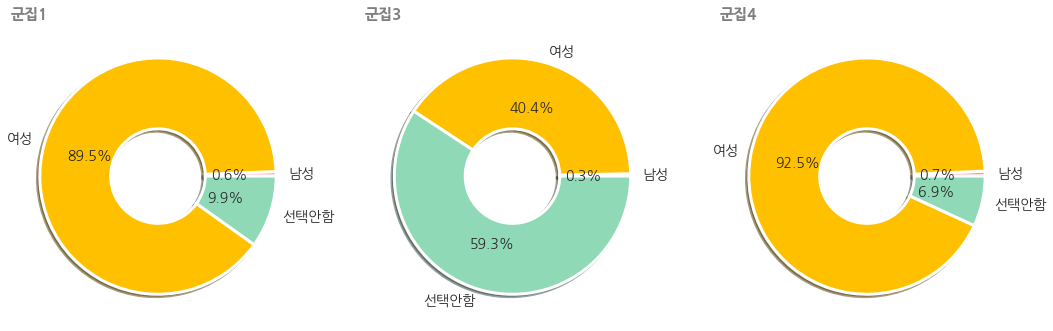

In [77]:
# 군집 별 성별 Pie Chart

plt.figure(figsize = ( 18, 6))

x_label =  ['남성', '여성', '선택안함']
c1 = [13,	1889,	208]
c3 = [7,	867,	1271]
c4 = [17,	2365,	176]

plt.subplot(131)
plt.pie(c1, labels = x_label, autopct = '%.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6'],
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집1', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.subplot(132)
plt.pie(c3, labels = x_label, autopct = '%.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6'],
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집3', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.subplot(133)
plt.pie(c4, labels = x_label, autopct = '%.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6'],
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집4', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.show()

In [78]:
#  군집 별 회원그룹 
ct_group_df = pd.crosstab(customer_df.군집_km, customer_df.회원그룹, margins = True)
ct_group_df = ct_group_df.drop([1,4], axis = 0)
ct_group_df

회원그룹,골드,그린(일반),블루,실버,All
군집_km,,,,,
0,9,1621,448,32,2110
2,15,1622,462,46,2145
3,18,1953,542,45,2558
All,44,5196,1452,123,6815


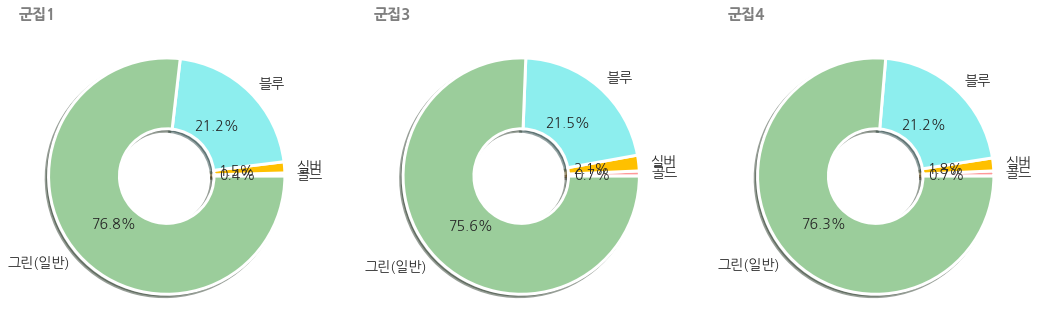

In [79]:
# 군집 별 회원그룹 새각화

plt.figure(figsize = ( 18, 6))

x_label =  ['골드', '실버', '블루', '그린(일반)']
c1 = [9,	32,	448,	1621 ]
c3 = [15,	46,	462,	1622]
c4 = [18,	45,	542,	1953]
colors =  ['#ff9999', '#ffc000', '#8DEEEE', '#9BCD9B']

plt.subplot(131)
plt.pie(c1, labels = x_label, autopct = '%.1f%%', colors = colors,
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집1', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.subplot(132)
plt.pie(c3, labels = x_label, autopct = '%.1f%%', colors =colors,
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집3', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.subplot(133)
plt.pie(c4, labels = x_label, autopct = '%.1f%%', colors = colors,
          shadow = True, wedgeprops = {'width' : 0.6, 'linewidth' : 3, 'edgecolor' : 'w'} )
plt.title('군집4', loc = 'left', pad = 10, fontweight =  'bold', fontsize = 15, color =  '#7F7F7F')

plt.show()

In [80]:
# 군집 별 RFM 분석
customer_df.rename(columns = {'주문횟수_x' : '주문횟수',  '주문량_x': '주문량', '주문금액합계_x' : '주문금액합계'}, inplace = True)
customer_df.rename(columns = {'최근성_x' : '최근성'}, inplace = True)
#customer_df.head()
rfm_군집 = customer_df.groupby('군집_km')['주문횟수', '주문금액합계', '최근성'].mean()
#rfm_cluster = rfm_cluster.drop([1,4], axis = 0)
rfm_군집

,주문횟수,주문금액합계,최근성
군집_km,,,
0,1.176303,5.760514e+04,256.014218
1,569.000000,3.006785e+07,2.000000
2,1.379487,6.778031e+04,52.801865
3,1.286161,6.617075e+04,147.343237
4,18.000000,7.550300e+06,23.000000


In [81]:
#  RFM 군집 별 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_rfm_cluster = scaler.fit_transform(rfm_군집)
scaled_rfm_cluster = pd.DataFrame(scaled_rfm_cluster, columns = ['주문횟수_ss', '주문금액합계_ss', '최근성_ss'], index = [0, 1,2, 3, 4])
scaled_rfm_cluster

,주문횟수_ss,주문금액합계_ss,최근성_ss
0,-0.518792,-0.645784,1.698055
1,1.999175,1.936742,-1.001430
2,-0.517891,-0.644909,-0.461544
3,-0.518305,-0.645047,0.543176
4,-0.444188,-0.001002,-0.778257


In [82]:
join_df = pd.concat([rfm_군집, scaled_rfm_cluster], axis = 1 )
join_df

,주문횟수,주문금액합계,최근성,주문횟수_ss,주문금액합계_ss,최근성_ss
0,1.176303,5.760514e+04,256.014218,-0.518792,-0.645784,1.698055
1,569.000000,3.006785e+07,2.000000,1.999175,1.936742,-1.001430
2,1.379487,6.778031e+04,52.801865,-0.517891,-0.644909,-0.461544
3,1.286161,6.617075e+04,147.343237,-0.518305,-0.645047,0.543176
4,18.000000,7.550300e+06,23.000000,-0.444188,-0.001002,-0.778257


In [83]:
#군집 3개만 고려하여 정규화 --> 변별력 확대 목적
rfm_cluster = rfm_군집.drop(labels = [1,4])

In [84]:
scaled_3clusters = scaler.fit_transform(rfm_cluster)
for i in range(0,3):    
    print(scaled_3clusters[i])


[-1.2565755  -1.39882109  1.25212237]
[ 1.19021614  0.87961782 -1.19539604]
[ 0.06635936  0.51920328 -0.05672634]


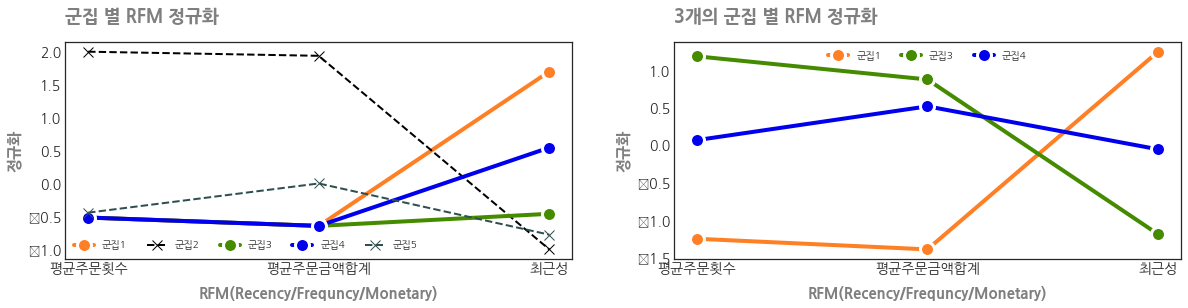

In [85]:
# RFM 정규화 ( 전체 5개 군집 기준  및 3개 군집 ) 시각화

x_labels = ['평균주문횟수',	'평균주문금액합계',	'최근성']
군집1 = [-0.518792,	-0.645784,	1.698055]
군집2 = [1.999175,	1.936742,	-1.001430]
군집3 = [-0.517891,	-0.644909,	-0.461544]
군집4 = [-0.518305,	-0.645047,	0.543176]
군집5 = [-0.444188,	-0.001002,	-0.778257]

c1 = scaled_3clusters[0]
c3 = scaled_3clusters[1]
c4 = scaled_3clusters[2]

plt.figure(figsize=(20,4))

plt.subplot(121)
plt.plot(x_labels, 군집1, label = '군집1', color = '#FF7F24',  linewidth = 4,marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)
plt.plot(x_labels, 군집2, label = '군집2', color = '#000000', linestyle = '--', linewidth = 2, marker = 'x', markersize = 10)
plt.plot(x_labels, 군집3, label = '군집3', color = '#458B00' ,linewidth = 4, marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)
plt.plot(x_labels, 군집4, label = '군집4', color = '#0000EE',linewidth = 4,marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)
plt.plot(x_labels, 군집5, label = '군집5', color = '#2F4F4F', linestyle = '--', linewidth = 2, marker = 'x', markersize = 10)

plt.title('군집 별 RFM 정규화', loc = 'left', fontsize = 18, fontweight = 'bold', pad = 20, color = '#7F7F7F')
plt.xlabel('RFM(Recency/Frequncy/Monetary)', labelpad = 10, fontsize = 15, fontweight = 'bold', color = '#7F7F7F')
plt.ylabel('정규화', labelpad = 5, fontsize = 15, fontweight = 'bold', color = '#7F7F7F')
plt.legend(ncol = 5, fontsize = 10)


plt.subplot(122)
plt.plot(x_labels, c1, label = '군집1', color = '#FF7F24',  linewidth = 4,marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)
plt.plot(x_labels, c3,  label = '군집3', color = '#458B00' ,linewidth = 4, marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)
plt.plot(x_labels, c4,  label = '군집4', color = '#0000EE',linewidth = 4,marker =  'o', markersize = 14, markeredgecolor = 'white', markeredgewidth = 3)

plt.title('3개의 군집 별 RFM 정규화', loc = 'left', fontsize = 18, fontweight = 'bold', pad = 20, color = '#7F7F7F')
plt.xlabel('RFM(Recency/Frequncy/Monetary)', labelpad = 10, fontsize = 15, fontweight = 'bold', color = '#7F7F7F')
plt.ylabel('정규화', labelpad = 5, fontsize = 15, fontweight = 'bold', color = '#7F7F7F')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10)
plt.show()


In [86]:
pip install sidetable

In [87]:
import sidetable

In [122]:

#군집별 df  생성
c1_df = customer_df.loc[customer_df['군집_km']==0]
c3_df = customer_df.loc[customer_df['군집_km']==2]
c4_df = customer_df.loc[customer_df['군집_km']==3]

# 군집 별 지역 분포
c1_by_region = pd.DataFrame(c1_df[['주소_도시급','주소_시군구급']].value_counts())
c1_by_region = c1_by_region.stb.subtotal()

c3_by_region = pd.DataFrame(c3_df[['주소_도시급','주소_시군구급']].value_counts())
c3_by_region = c3_by_region.stb.subtotal()

c4_by_region = pd.DataFrame(c4_df[['주소_도시급','주소_시군구급']].value_counts())
c4_by_region = c4_by_region.stb.subtotal()

c1_by_region.to_csv(r'C:\Users\junoh\OneDrive\이너피플\git\두두월드\c1_by_region_v1.csv', encoding = 'utf-8-sig', header = True )
c3_by_region.to_csv(r'C:\Users\junoh\OneDrive\이너피플\git\두두월드\c3_by_region_v1.csv', encoding = 'utf-8-sig', header = True )
c4_by_region.to_csv(r'C:\Users\junoh\OneDrive\이너피플\git\두두월드\c4_by_region_v1.csv', encoding = 'utf-8-sig', header = True )


###### 고객 군집 별 구매 제품 분석

In [89]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 27812
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주문번호               27813 non-null  object 
 1   품목별 주문번호           27813 non-null  object 
 2   배송번호               27813 non-null  object 
 3   주문상품코드             27813 non-null  object 
 4   주문상품명              27813 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)  6598 non-null   object 
 6   옵션별상품코드            27813 non-null  object 
 7   주문품목 수량            27813 non-null  int64  
 8   주문품목 단가            27813 non-null  int64  
 9   주문품목 결제금액          27813 non-null  int64  
 10  주문일시               27813 non-null  object 
 11  주문경로               26931 non-null  object 
 12  주문검색어              21152 non-null  object 
 13  구매횟수               27812 non-null  float64
 14  결제금액(주문전체)         27813 non-null  int64  
 15  결제금액(품목별)          27813 non-null  int64  
 16  결제방법               278

In [90]:
# 간단 EDA 탐색

full_df.head()
top20_pd = full_df.주문상품명.value_counts().head(20).to_dict()
top20_pd_df = pd.DataFrame(list(top20_pd.items()),columns = ['구매제품명', '구매수량'])

top20_pd_df

,구매제품명,구매수량
0,서랍칸 다용도박스 세트,954
1,[무료배송] 하프트레이대소 12개세트_투명/화이트,742
2,실리쿡 계란 레일바스켓 30구,657
3,유리물병 1000ml 3개,557
4,냉장고 냉동실 정리용기 깊은2호 8개세트(아이보리),474
5,트레이중 3개,447
6,투명네임택,440
7,롱트레이세트,431
8,롱하프트레이대소 10개세트(투명),412
9,슬라이딩트레이3개세트,358


In [91]:
대분류_df = pd.DataFrame(full_df.대분류.value_counts())
대분류_df.reset_index()

,index,대분류
0,냉장고 정리,13616
1,정리수납용품,11240
2,유리용품,1565
3,주방용품,872
4,생활수납용품,475
5,기타상품,45


군집1에 대한 구매 제품 분석 ( 연관분석 )

In [92]:
# 군집 1 에 대한 구매 제품 분석

군집1_df = full_df[full_df['군집_km'] == 0]
군집1_df.head()

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로,주문횟수,주문량,주문금액합계,최근성,군집_km
0,20210901000757-68539640174,20210901000757-68539640174_[1],S-21090100-260412059-01,13003000002,사각실속기프트세트,NaN,M83-0000000000000001,1,11900,11900,...,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE,1,2,65900,302,0
1,20210901000757-68539640174,20210901000757-68539640174_[2],S-21090100-260412059-00,13007000013,"납작이 1+1세트,홈쇼핑구성",NaN,M1301-00000000000001,1,54000,54000,...,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE,1,2,65900,302,0
2,20210901001324-15711112237,20210901001324-15711112237_[1],S-21090100-407834699-04,14006000052,슬라이딩트레이3개세트,NaN,M374-000000000000001,1,6900,6900,...,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE,1,5,49900,302,0
3,20210901001324-15711112237,20210901001324-15711112237_[2],S-21090100-407834699-03,14007000004,서랍칸 다용도박스 세트,,M390-000000000000002,1,6800,12000,...,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE,1,5,49900,302,0
4,20210901001324-15711112237,20210901001324-15711112237_[3],S-21090100-407834699-02,14005000002,원더바스켓 일자 확장형 선반,NaN,M410-000000000000001,1,12900,12900,...,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE,1,5,49900,302,0


In [93]:
# 군집1 Top 20 구매 제품
군집1_pd_df = pd.DataFrame(군집1_df.groupby([ '상품번호','주문상품명'])['주문품목 수량'].sum())
군집1_pd_df.reset_index(inplace = True)
군집1_pd_df = 군집1_pd_df.sort_values(by = ['주문품목 수량'], ascending = False, axis = 0)
top20_군집1_pd = 군집1_pd_df.head(20)
top20_군집1_pd

,상품번호,주문상품명,주문품목 수량
77,244,납작2호/깊은2호 뚜껑,691
76,243,납작이3호(300ml) 뚜껑,521
30,70,투명네임택,378
120,390,서랍칸 다용도박스 세트,305
25,53,소스받침(받침2호) 2개,293
176,1235,진공 압축팩_일반형 소/중/대,276
249,3520540,[무료배송] 하프트레이대소 12개세트_투명/화이트,251
174,1233,진공 압축팩-걸이형,237
2,7,사각2호 1개,230
6,12,[무료배송] 냉장고 문 수납용기 사각1호기본세트(8개 구성),207


In [94]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [95]:
# 군집1 제품 연관관계 분석

# 아이디 별 구매제품 list

c1_pd_by_id = 군집1_df.groupby('아이디')['상품번호'].apply(list)

In [96]:
te = TransactionEncoder()
te_c1_df = te.fit_transform(c1_pd_by_id)
te_c1_df = pd.DataFrame(te_c1_df, columns = te.columns_, index = c1_pd_by_id.index)
te_c1_df.head()
te_c1_df.reset_index(drop=True)

,2,5,7,8,9,10,12,23,25,28,...,3520646,3520647,3520648,3520649,3520652,3520653,3520655,3520718,3520735,3520736
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,False,False,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2106,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
apr_c1_df = apriori(te_c1_df, min_support = 0.01, use_colnames = True)
apr_c1_df

,support,itemsets
0,0.015640,(2)
1,0.024645,(7)
2,0.019905,(9)
3,0.018483,(10)
4,0.083886,(12)
...,...,...
113,0.010900,"(464, 390)"
114,0.018957,"(3520540, 390)"
115,0.010427,"(3520569, 390)"
116,0.012796,"(3520571, 390)"


In [98]:
c1_association_df =association_rules(apr_c1_df, metric = 'confidence', min_threshold = 0.2)
c1_association_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(53),(390),0.046919,0.129858,0.018483,0.393939,3.033621,0.012391,1.435735
1,(243),(244),0.037441,0.052607,0.026066,0.696203,13.234120,0.024097,3.118503
2,(244),(243),0.052607,0.037441,0.026066,0.495495,13.234120,0.024097,1.907930
3,(374),(343),0.053555,0.062559,0.010900,0.203540,3.253553,0.007550,1.177009
4,(343),(390),0.062559,0.129858,0.016114,0.257576,1.983521,0.007990,1.172028
5,(374),(390),0.053555,0.129858,0.016114,0.300885,2.317034,0.009159,1.244634
6,(402),(390),0.085308,0.129858,0.019431,0.227778,1.754055,0.008353,1.126803
7,(464),(390),0.047867,0.129858,0.010900,0.227723,1.753632,0.004685,1.126723
8,(3520569),(390),0.040758,0.129858,0.010427,0.255814,1.969954,0.005134,1.169254
9,(3520571),(390),0.054502,0.129858,0.012796,0.234783,1.807997,0.005719,1.137118


In [99]:
# 군집1의 연관분석을 지지도 기준으로....
c1_association_df.sort_values('support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(243),(244),0.037441,0.052607,0.026066,0.696203,13.234120,0.024097,3.118503
2,(244),(243),0.052607,0.037441,0.026066,0.495495,13.234120,0.024097,1.907930
6,(402),(390),0.085308,0.129858,0.019431,0.227778,1.754055,0.008353,1.126803
0,(53),(390),0.046919,0.129858,0.018483,0.393939,3.033621,0.012391,1.435735
4,(343),(390),0.062559,0.129858,0.016114,0.257576,1.983521,0.007990,1.172028
5,(374),(390),0.053555,0.129858,0.016114,0.300885,2.317034,0.009159,1.244634
9,(3520571),(390),0.054502,0.129858,0.012796,0.234783,1.807997,0.005719,1.137118
10,(3520543),(3520540),0.027014,0.097630,0.011374,0.421053,4.312724,0.008737,1.558639
3,(374),(343),0.053555,0.062559,0.010900,0.203540,3.253553,0.007550,1.177009
7,(464),(390),0.047867,0.129858,0.010900,0.227723,1.753632,0.004685,1.126723


In [100]:
# 군집1의 연관분석을 신뢰도 기준으로....
c1_association_df.sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(243),(244),0.037441,0.052607,0.026066,0.696203,13.234120,0.024097,3.118503
2,(244),(243),0.052607,0.037441,0.026066,0.495495,13.234120,0.024097,1.907930
10,(3520543),(3520540),0.027014,0.097630,0.011374,0.421053,4.312724,0.008737,1.558639
0,(53),(390),0.046919,0.129858,0.018483,0.393939,3.033621,0.012391,1.435735
5,(374),(390),0.053555,0.129858,0.016114,0.300885,2.317034,0.009159,1.244634
4,(343),(390),0.062559,0.129858,0.016114,0.257576,1.983521,0.007990,1.172028
8,(3520569),(390),0.040758,0.129858,0.010427,0.255814,1.969954,0.005134,1.169254
9,(3520571),(390),0.054502,0.129858,0.012796,0.234783,1.807997,0.005719,1.137118
6,(402),(390),0.085308,0.129858,0.019431,0.227778,1.754055,0.008353,1.126803
7,(464),(390),0.047867,0.129858,0.010900,0.227723,1.753632,0.004685,1.126723


In [101]:
# 군집1의 연관분석을 향상도 기준으로....
c1_association_df.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(243),(244),0.037441,0.052607,0.026066,0.696203,13.234120,0.024097,3.118503
2,(244),(243),0.052607,0.037441,0.026066,0.495495,13.234120,0.024097,1.907930
10,(3520543),(3520540),0.027014,0.097630,0.011374,0.421053,4.312724,0.008737,1.558639
3,(374),(343),0.053555,0.062559,0.010900,0.203540,3.253553,0.007550,1.177009
0,(53),(390),0.046919,0.129858,0.018483,0.393939,3.033621,0.012391,1.435735
5,(374),(390),0.053555,0.129858,0.016114,0.300885,2.317034,0.009159,1.244634
4,(343),(390),0.062559,0.129858,0.016114,0.257576,1.983521,0.007990,1.172028
8,(3520569),(390),0.040758,0.129858,0.010427,0.255814,1.969954,0.005134,1.169254
9,(3520571),(390),0.054502,0.129858,0.012796,0.234783,1.807997,0.005719,1.137118
6,(402),(390),0.085308,0.129858,0.019431,0.227778,1.754055,0.008353,1.126803


군집3에 대한 구매 제품 분석 ( 연관분석 )

In [102]:
# 군집 3 에 대한 구매 제품 분석

군집3_df = full_df[full_df['군집_km'] == 2]
군집3_df.head()

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로,주문횟수,주문량,주문금액합계,최근성,군집_km
16,20210901003226-06035338062,20210901003226-06035338062_[1],S-21090100-911360944-03,13001000048,납작3호(그린) 5개,NaN,M142-000000000000001,1,7900,7900,...,2022-03-27,2022-03-27,www.silicook.co.kr/m,실리쿡,MOBILE,2,14,35390,95,2
17,20210901003226-06035338062,20210901003226-06035338062_[2],S-21090100-911360944-02,13004000008,납작이3호(300ml) 뚜껑,납작3호300ml뚜껑(화이트),M243-000000000000001,1,350,350,...,2022-03-27,2022-03-27,www.silicook.co.kr/m,실리쿡,MOBILE,2,14,35390,95,2
18,20210901003226-06035338062,20210901003226-06035338062_[3],S-21090100-911360944-01,13004000007,납작2호/깊은2호 뚜껑,납작2호600ml뚜껑(화이트),M244-000000000000001,2,490,980,...,2022-03-27,2022-03-27,www.silicook.co.kr/m,실리쿡,MOBILE,2,14,35390,95,2
19,20210901003226-06035338062,20210901003226-06035338062_[4],S-21090100-911360944-00,13007000068,깊은3호(화이트) 1개,NaN,M3519611-00000000001,1,3900,3900,...,2022-03-27,2022-03-27,www.silicook.co.kr/m,실리쿡,MOBILE,2,14,35390,95,2
20,20220327002256-18812623658,20220327002256-18812623658_[3],S-22032700-315551334-00,14006000108,하프트레이특대소 6개세트_투명/화이트,투명,M3520542-00000000002,1,18900,18900,...,2022-03-27,2022-03-27,www.silicook.co.kr/m,실리쿡,MOBILE,2,14,35390,95,2


In [103]:
# 군집3의 Top20 제품 구매 분석

군집3_pd_df = pd.DataFrame(군집3_df.groupby(['상품번호', '주문상품명'])['주문품목 수량'].sum())
군집3_pd_df.reset_index(inplace = True)
군집3_pd_df.sort_values('주문품목 수량', ascending = False, axis = 0, inplace = True)
top20_군집3_pd = 군집3_pd_df.head(20)
top20_군집3_pd

,상품번호,주문상품명,주문품목 수량
223,1233,진공 압축팩-걸이형,553
111,244,납작2호/깊은2호 뚜껑,406
4,7,사각2호 1개,391
369,3521065,납작이 뚜껑 모음전,383
160,390,서랍칸 다용도박스 세트,375
110,243,납작이3호(300ml) 뚜껑,300
44,70,투명네임택,277
37,52,다용도박스 4개,273
319,3520540,[무료배송] 하프트레이대소 12개세트_투명/화이트,249
296,3519841,유리물병 1000ml 3개,230


In [104]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [105]:
# 군집3 제품 연관관계 분석
# 아이디 별 구매제품 list
c3_pd_by_id = 군집3_df.groupby('아이디')['상품번호'].apply(list)
c3_pd_by_id

아이디
0baltan                                           [3520972, 959]
1004and        [3520540, 3520546, 3520546, 3520540, 3520540, ...
1204promise                               [3520551, 390, 107, 1]
2002mina                                [3519841, 410, 408, 408]
4devas         [3520588, 436, 434, 402, 110, 3520653, 3520541...
                                     ...                        
yundj77                                  [3521066, 248, 130, 37]
zang1027                                         [249, 180, 101]
zhddl01        [39, 113, 180, 464, 3520542, 3520542, 3520735,...
zjvl2wks                                         [3519611, 9, 7]
zzang9958                                                 [1442]
Name: 상품번호, Length: 2145, dtype: object

In [106]:
te3=TransactionEncoder()
te_c3 = te3.fit_transform(c3_pd_by_id)
te_c3_df = pd.DataFrame(te_c3, columns = te3.columns_, index = c3_pd_by_id.index )
te_c3_df.head()
te_c3_df.reset_index(drop = True, inplace = True)
te_c3_df.head()

,1,2,5,7,8,9,10,12,23,25,...,3520969,3520970,3520972,3521054,3521055,3521056,3521065,3521066,3521072,3521073
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [107]:
apr_c3_df = apriori(te_c3_df, min_support = 0.01, use_colnames = True)
apr_c3_df

,support,itemsets
0,0.033566,(1)
1,0.016317,(2)
2,0.032634,(7)
3,0.022844,(9)
4,0.018648,(10)
...,...,...
132,0.016783,"(3519841, 390)"
133,0.016317,"(3520540, 390)"
134,0.012121,"(3520571, 390)"
135,0.017249,"(3520652, 390)"


In [108]:
c3_association_df = association_rules(apr_c3_df, metric = 'confidence', min_threshold = 0.2)
c3_association_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(7),0.022844,0.032634,0.011189,0.489796,15.008746,0.010443,1.896037
1,(7),(9),0.032634,0.022844,0.011189,0.342857,15.008746,0.010443,1.486977
2,(50),(52),0.044755,0.046154,0.013054,0.291667,6.319444,0.010988,1.346606
3,(52),(50),0.046154,0.044755,0.013054,0.282828,6.319444,0.010988,1.331961
4,(50),(390),0.044755,0.133333,0.021911,0.489583,3.671875,0.015944,1.697959
5,(52),(53),0.046154,0.052214,0.011655,0.252525,4.836310,0.009245,1.267983
6,(53),(52),0.052214,0.046154,0.011655,0.223214,4.836310,0.009245,1.227940
7,(53),(390),0.052214,0.133333,0.014918,0.285714,2.142857,0.007956,1.213333
8,(70),(390),0.058275,0.133333,0.017249,0.296000,2.220000,0.009479,1.231061
9,(161),(390),0.041492,0.133333,0.010723,0.258427,1.938202,0.005190,1.168687


In [109]:
# 군집3의 연관분석을 지지도 기준으로....
c3_association_df.sort_values('support', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(402),(390),0.089977,0.133333,0.023310,0.259067,1.943005,0.011313,1.169697
4,(50),(390),0.044755,0.133333,0.021911,0.489583,3.671875,0.015944,1.697959
10,(243),(244),0.022378,0.032168,0.018648,0.833333,25.905797,0.017928,5.806993
11,(244),(243),0.032168,0.022378,0.018648,0.579710,25.905797,0.017928,2.326067
8,(70),(390),0.058275,0.133333,0.017249,0.296000,2.220000,0.009479,1.231061
7,(53),(390),0.052214,0.133333,0.014918,0.285714,2.142857,0.007956,1.213333
17,(464),(390),0.045221,0.133333,0.014452,0.319588,2.396907,0.008423,1.273737
13,(343),(390),0.059207,0.133333,0.014452,0.244094,1.830709,0.006558,1.146528
14,(374),(390),0.046154,0.133333,0.013986,0.303030,2.272727,0.007832,1.243478
2,(50),(52),0.044755,0.046154,0.013054,0.291667,6.319444,0.010988,1.346606


In [110]:
# 군집3의 연관분석을 신뢰도 기준으로....
c3_association_df.sort_values('confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(243),(244),0.022378,0.032168,0.018648,0.833333,25.905797,0.017928,5.806993
11,(244),(243),0.032168,0.022378,0.018648,0.579710,25.905797,0.017928,2.326067
0,(9),(7),0.022844,0.032634,0.011189,0.489796,15.008746,0.010443,1.896037
4,(50),(390),0.044755,0.133333,0.021911,0.489583,3.671875,0.015944,1.697959
12,(315),(3519841),0.027506,0.091841,0.012121,0.440678,4.798245,0.009595,1.623677
1,(7),(9),0.032634,0.022844,0.011189,0.342857,15.008746,0.010443,1.486977
17,(464),(390),0.045221,0.133333,0.014452,0.319588,2.396907,0.008423,1.273737
14,(374),(390),0.046154,0.133333,0.013986,0.303030,2.272727,0.007832,1.243478
8,(70),(390),0.058275,0.133333,0.017249,0.296000,2.220000,0.009479,1.231061
2,(50),(52),0.044755,0.046154,0.013054,0.291667,6.319444,0.010988,1.346606


In [111]:
# 군집3의 연관분석을 향상도 기준으로....
c3_association_df.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(244),(243),0.032168,0.022378,0.018648,0.579710,25.905797,0.017928,2.326067
10,(243),(244),0.022378,0.032168,0.018648,0.833333,25.905797,0.017928,5.806993
0,(9),(7),0.022844,0.032634,0.011189,0.489796,15.008746,0.010443,1.896037
1,(7),(9),0.032634,0.022844,0.011189,0.342857,15.008746,0.010443,1.486977
2,(50),(52),0.044755,0.046154,0.013054,0.291667,6.319444,0.010988,1.346606
3,(52),(50),0.046154,0.044755,0.013054,0.282828,6.319444,0.010988,1.331961
5,(52),(53),0.046154,0.052214,0.011655,0.252525,4.836310,0.009245,1.267983
6,(53),(52),0.052214,0.046154,0.011655,0.223214,4.836310,0.009245,1.227940
12,(315),(3519841),0.027506,0.091841,0.012121,0.440678,4.798245,0.009595,1.623677
4,(50),(390),0.044755,0.133333,0.021911,0.489583,3.671875,0.015944,1.697959


군집4에 대한 구매 제품 분석 ( 연관분석)

In [112]:
군집4_df = full_df[full_df['군집_km'] == 3]
군집4_df.head()

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로,주문횟수,주문량,주문금액합계,최근성,군집_km
1130,20210901155136-68633532089,20210901155136-68633532089_[1],S-21090115-714319292-04,13003000008,[무료배송] 냉장고 문 수납용기 사각1호기본세트(8개 구성),NaN,M12-0000000000000001,1,12900,12900,...,2022-02-16,2022-02-17,www.silicook.co.kr/m,실리쿡,MOBILE,2,13,134000,134,3
1131,20210901155136-68633532089,20210901155136-68633532089_[2],S-21090115-714319292-03,13007000019,실리쿡 납작이 시스루 실속세트,NaN,M110-000000000000001,1,28900,28900,...,2022-02-16,2022-02-17,www.silicook.co.kr/m,실리쿡,MOBILE,2,13,134000,134,3
1132,20210901155136-68633532089,20210901155136-68633532089_[3],S-21090115-714319292-02,14007000004,서랍칸 다용도박스 세트,다용도박스 12개,M390-000000000000002,1,6800,12000,...,2022-02-16,2022-02-17,www.silicook.co.kr/m,실리쿡,MOBILE,2,13,134000,134,3
1133,20210901155136-68633532089,20210901155136-68633532089_[4],S-21090115-714319292-01,14005000002,원더바스켓 일자 확장형 선반,NaN,M410-000000000000001,1,12900,12900,...,2022-02-16,2022-02-17,www.silicook.co.kr/m,실리쿡,MOBILE,2,13,134000,134,3
1134,20210901155136-68633532089,20210901155136-68633532089_[5],S-21090115-714319292-00,13007000020,납작3호 트레이세트,NaN,M1309-00000000000001,1,15000,15000,...,2022-02-16,2022-02-17,www.silicook.co.kr/m,실리쿡,MOBILE,2,13,134000,134,3


In [113]:
# 군집4의 Top20 제품 구매 분석
c4_pd_df = pd.DataFrame(군집4_df.groupby(['상품번호', '주문상품명'])['주문품목 수량'].sum())
c4_pd_df.reset_index(inplace = True)
c4_pd_df.sort_values('주문품목 수량', ascending = False, inplace = True)
top20_c4_df = c4_pd_df.head(20)
top20_c4_df

,상품번호,주문상품명,주문품목 수량
107,244,납작2호/깊은2호 뚜껑,793
40,53,소스받침(받침2호) 2개,542
106,243,납작이3호(300ml) 뚜껑,516
5,7,사각2호 1개,409
153,390,서랍칸 다용도박스 세트,381
45,70,투명네임택,363
303,3520540,[무료배송] 하프트레이대소 12개세트_투명/화이트,358
131,315,유리물병뚜껑세트,349
158,402,실리쿡 계란 레일바스켓 30구,291
217,1235,진공 압축팩_일반형 소/중/대,284


In [114]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [115]:
#  군집4  구매 제품 연관관계 분석
# 아이디별 구매제품 encoder

c4_pd_by_id = 군집4_df.groupby('아이디')['상품번호'].apply(list)
c4_pd_by_id

아이디
0223cha@naver.com                                  [341, 390, 3519717]
0514lmy                                                      [3519841]
1219kwon                [38, 41, 69, 70, 390, 392, 859, 1239, 3520571]
22yun                                  [3520735, 3520525, 3520523, 69]
23seunghyun                       [3520652, 390, 50, 3520541, 3520541]
                                             ...                      
zoning                                                           [180]
zzang0519                                         [343, 1299, 3520644]
zzangahrubi@naver.co                                     [43, 3520540]
zzini1009                                                        [326]
zzocco02                         [402, 3520541, 3520545, 3520588, 110]
Name: 상품번호, Length: 2558, dtype: object

In [116]:
te4 = TransactionEncoder()
te_c4_df = te4.fit_transform(c4_pd_by_id)
te_c4_df = pd.DataFrame(te_c4_df, columns = te4.columns_, index = c4_pd_by_id.index)
te_c4_df.reset_index(drop = True, inplace = True)
te_c4_df.head()

,1,2,5,7,8,9,10,12,23,25,...,3520649,3520652,3520653,3520655,3520718,3520735,3520736,3520968,3520969,3520970
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [117]:
apr_c4_df = apriori(te_c4_df, min_support = 0.01, use_colnames = True)
apr_c4_df

,support,itemsets
0,0.012119,(1)
1,0.026583,(2)
2,0.033229,(7)
3,0.027365,(9)
4,0.013683,(10)
...,...,...
121,0.012119,"(3520571, 390)"
122,0.012901,"(3520652, 390)"
123,0.012901,"(464, 402)"
124,0.012901,"(3520652, 3520540)"


In [118]:
c4_association_df = association_rules(apr_c4_df, metric = 'confidence', min_threshold = 0.2)
c4_association_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(52),(53),0.043784,0.063722,0.010946,0.250000,3.923313,0.008156,1.248371
1,(53),(390),0.063722,0.127834,0.019156,0.300613,2.351588,0.011010,1.247044
2,(70),(390),0.061376,0.127834,0.013292,0.216561,1.694073,0.005446,1.113252
3,(243),(244),0.028929,0.041439,0.018765,0.648649,15.653238,0.017566,2.728213
4,(244),(243),0.041439,0.028929,0.018765,0.452830,15.653238,0.017566,1.774716
5,(248),(402),0.054730,0.105160,0.011337,0.207143,1.969782,0.005582,1.128627
6,(315),(3519841),0.032447,0.067631,0.012119,0.373494,5.522529,0.009924,1.488204
7,(374),(390),0.048866,0.127834,0.010946,0.224000,1.752269,0.004699,1.123925
8,(402),(390),0.105160,0.127834,0.023456,0.223048,1.744825,0.010013,1.122548
9,(464),(390),0.053948,0.127834,0.011337,0.210145,1.643886,0.004441,1.104210


In [119]:
# 군집4 연관분석을 지지도 기준으로....
c4_association_df.sort_values('support', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(402),(390),0.105160,0.127834,0.023456,0.223048,1.744825,0.010013,1.122548
1,(53),(390),0.063722,0.127834,0.019156,0.300613,2.351588,0.011010,1.247044
3,(243),(244),0.028929,0.041439,0.018765,0.648649,15.653238,0.017566,2.728213
4,(244),(243),0.041439,0.028929,0.018765,0.452830,15.653238,0.017566,1.774716
2,(70),(390),0.061376,0.127834,0.013292,0.216561,1.694073,0.005446,1.113252
10,(464),(402),0.053948,0.105160,0.012901,0.239130,2.273962,0.007227,1.176075
6,(315),(3519841),0.032447,0.067631,0.012119,0.373494,5.522529,0.009924,1.488204
5,(248),(402),0.054730,0.105160,0.011337,0.207143,1.969782,0.005582,1.128627
9,(464),(390),0.053948,0.127834,0.011337,0.210145,1.643886,0.004441,1.104210
0,(52),(53),0.043784,0.063722,0.010946,0.250000,3.923313,0.008156,1.248371


In [120]:
# 군집4 연관분석을 신뢰도 기준으로....
c4_association_df.sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(243),(244),0.028929,0.041439,0.018765,0.648649,15.653238,0.017566,2.728213
4,(244),(243),0.041439,0.028929,0.018765,0.452830,15.653238,0.017566,1.774716
6,(315),(3519841),0.032447,0.067631,0.012119,0.373494,5.522529,0.009924,1.488204
1,(53),(390),0.063722,0.127834,0.019156,0.300613,2.351588,0.011010,1.247044
0,(52),(53),0.043784,0.063722,0.010946,0.250000,3.923313,0.008156,1.248371
10,(464),(402),0.053948,0.105160,0.012901,0.239130,2.273962,0.007227,1.176075
7,(374),(390),0.048866,0.127834,0.010946,0.224000,1.752269,0.004699,1.123925
8,(402),(390),0.105160,0.127834,0.023456,0.223048,1.744825,0.010013,1.122548
2,(70),(390),0.061376,0.127834,0.013292,0.216561,1.694073,0.005446,1.113252
9,(464),(390),0.053948,0.127834,0.011337,0.210145,1.643886,0.004441,1.104210


In [121]:
# 군집4 연관분석을 향상도 기준으로....
c4_association_df.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(243),(244),0.028929,0.041439,0.018765,0.648649,15.653238,0.017566,2.728213
4,(244),(243),0.041439,0.028929,0.018765,0.452830,15.653238,0.017566,1.774716
6,(315),(3519841),0.032447,0.067631,0.012119,0.373494,5.522529,0.009924,1.488204
0,(52),(53),0.043784,0.063722,0.010946,0.250000,3.923313,0.008156,1.248371
1,(53),(390),0.063722,0.127834,0.019156,0.300613,2.351588,0.011010,1.247044
10,(464),(402),0.053948,0.105160,0.012901,0.239130,2.273962,0.007227,1.176075
5,(248),(402),0.054730,0.105160,0.011337,0.207143,1.969782,0.005582,1.128627
7,(374),(390),0.048866,0.127834,0.010946,0.224000,1.752269,0.004699,1.123925
8,(402),(390),0.105160,0.127834,0.023456,0.223048,1.744825,0.010013,1.122548
2,(70),(390),0.061376,0.127834,0.013292,0.216561,1.694073,0.005446,1.113252
